<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height="200"> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Cálculo Numérico <br></strong></span></div> <br>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>

<div style="border: 2px solid black; padding: 10px; width: 95%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Regularização Polinomial
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

### Examplo 1.1: Ajuste de Curva Polinomial (Bishop, pg. 4)

Neste exemplo ([Bishop, pg. 4](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)), apresentaremos implementações relacionadas ao ajuste de curvas por meio de polinômios. Observaremos que, ao empregar polinômios de altos graus, frequentemente não atingimos um modelo capaz de generalizar os dados de treinamento; ou seja, quando aplicados para prever dados diferentes dos utilizados na sua configuração, o modelo pode falhar significativamente. Felizmente, apresentaremos um método para superar este desafio através do uso da regularização polinomial. Esse método nos permite introduzir uma penalidade aos coeficientes dos polinômios de ordens mais elevadas, reduzindo assim o risco de sobreajuste e melhorando a capacidade do modelo de realizar previsões acuradas para dados fora do conjunto de treinamento.

### Importações Necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Função de Geração do Polinômio de Ajuste

A seguir apresentaremos a função de geração do polinômio de ajuste aos valores de uma fução $f$.

In [2]:
def ajuste_poly(x, y, n, f, a, b):
    
    # x: Vetor de entradas.
    # y: Vetor de saídas correspondentes às entradas.
    # n: Grau do polinômio utilizado no ajuste.
    # f: Representação em string da função que se deseja ajustar aos dados.
    # a: Limite inferior do intervalo dos dados de treinamento.
    # b: Limite superior do intervalo dos dados de treinamento.
    
    # Calcula os coeficientes do polinômio de ajuste utilizando o método dos mínimos quadrados.
    coeficientes = np.polyfit(x, y, n)
    
    # Gera uma função polinomial a partir dos coeficientes calculados.
    p = np.poly1d(coeficientes)
    
    # Define uma função que avalia uma expressão f(x) fornecida como string.
    def F(x):
        return eval(f) # Avalia a expressão f para um dado valor de x.
    
    # Gera um conjunto de pontos x densamente distribuídos para a avaliação do ajuste polinomial.
    x_entrada = np.linspace(min(x), max(x), 500)
    # Avalia o polinômio de ajuste nos pontos x_fino.
    y_saida = p(x_entrada)

    # Realiza a plotagem dos dados originais.
    plt.scatter(x, y, label='Dados Originais')

    # Plota o polinômio de ajuste.
    plt.plot(x_entrada, y_saida, 'r-', label=f'$P_{n}(x)$')

    # Calcula e plota a função genérica f(x) nos mesmos pontos x_fino.
    y_funcao = F(x_entrada)
    plt.plot(x_entrada, y_funcao, 'g-', label='Função f(x)')

    # Configura os rótulos dos eixos e o título do gráfico, e exibe a legenda.
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Ajuste de Curva Usando Um Polinômio de grau {n}')
    plt.legend()
    plt.show()


### Ajuste a Partir de N = 10 Valores de Treino

A célula a seguir impelemta a função $f(x) = sen(2\pi x)$ adicionando um ruído gaussiano $N(0,0.05)$ aos dados de entrada. Serão gerados dez valores de entrada espaçados uniformemente entre $0$ e $1$.

In [3]:
# Definição dos limites do intervalo [a, b]
a = 0
b = 1

# Número de valores de entrada
N = 10

# Cálculo do incremento para gerar valores espaçados uniformemente
delta = (b - a) / N

# Inicialização das listas para armazenar os valores de entrada (x_treino) e saída (y_treino)
x_treino = []
y_treino = []

# Geração dos dados com ruído
for i in range(N):
    # Geração de um ruído gaussiano com média 0 e desvio padrão 0.03
    ruido = random.normalvariate(0, 0.3)
    
    # Cálculo do valor atual de x com o acréscimo de i*delta
    xi = a + i * delta
    
    # Adicionando o valor de x à lista
    x_treino.append(xi)
    
    # Cálculo de f(x) = sin(2*pi*x) com ruído e adição à lista de saídas
    y_treino.append(np.sin(2 * np.pi * xi) + ruido)

Por exemplo, para $n = 4$ (polinômio de ajuste de grau $4$), temos o seguinte esboço:

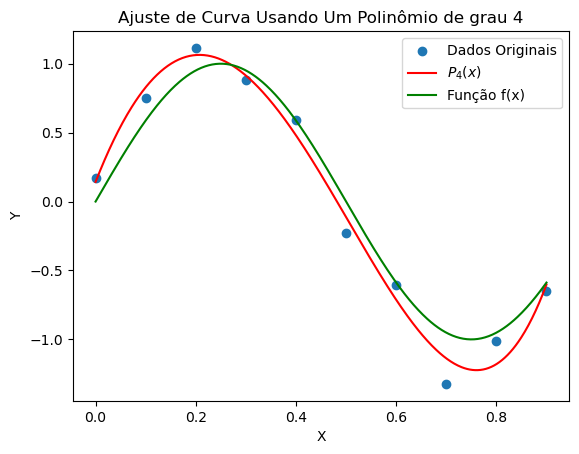

In [4]:
ajuste_poly(x_treino, y_treino, 4, 'np.sin(2*np.pi*x)', a, b)

Vejamos, desde $n = 1$ até $n = 9$ o comportamento dos polinômios de ajuste:

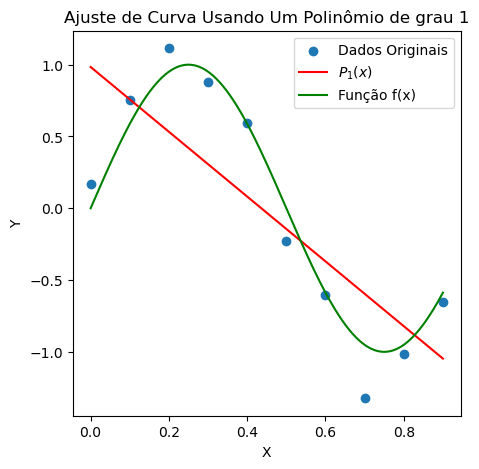

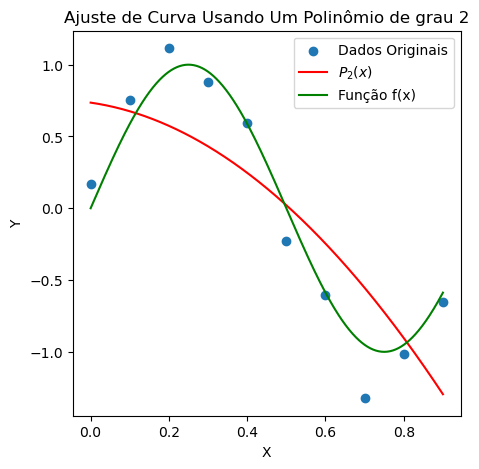

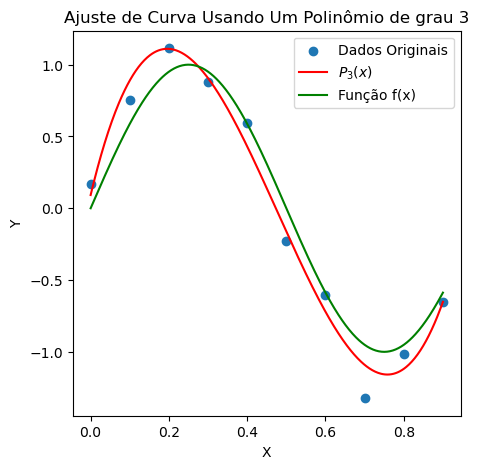

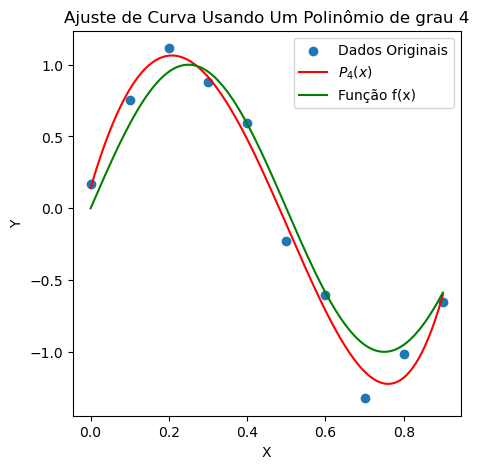

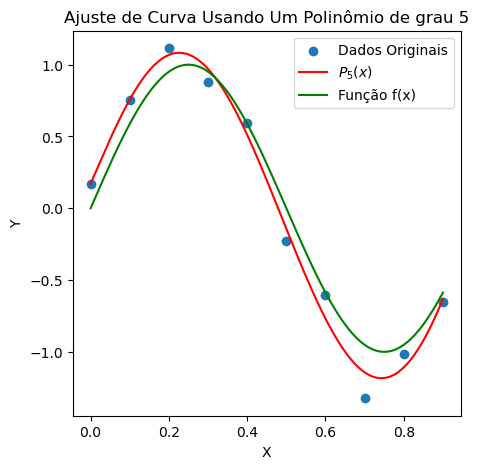

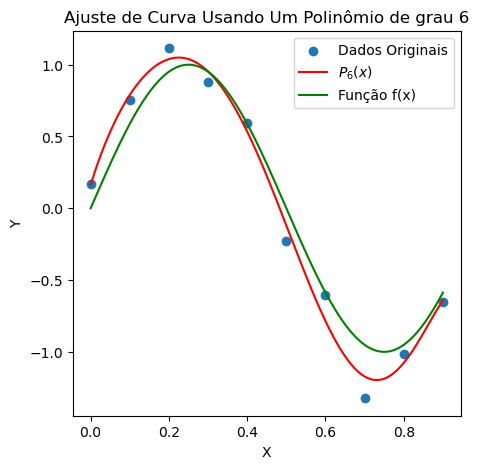

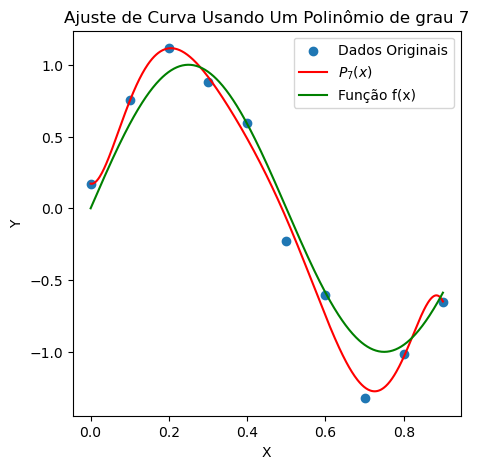

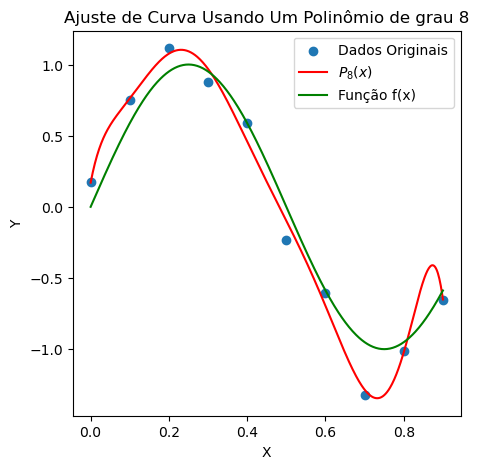

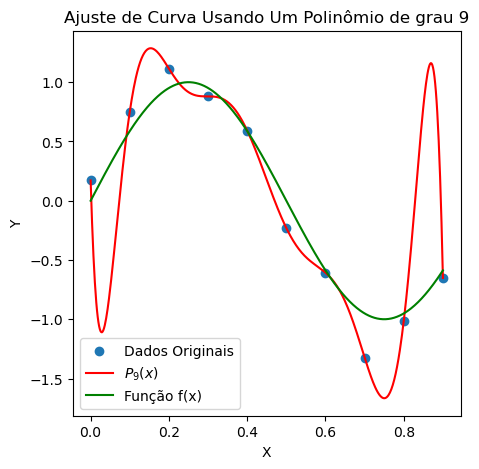

In [5]:
for n in range(1, 10):
    plt.figure(figsize=(5, 5))
    ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)

Observe que, à medida que incrementamos o grau do polinômio de ajuste (e, consequentemente, a complexidade), a curva de ajuste tende a apresentar sobreajuste em regiões fora dos dados de treinamento. Isso se manifesta como um desvio crescente entre os valores previstos pelo polinômio e os valores reais esperados, isto é, os da função $f(x)$ (acrescida de ruído).

A seguir temos a implmentação do cálculo do erro quadrático para cada um dos polinômios $9$ polinômios dados anteriormente.

In [6]:
for k in range(1,10):
    # Coeficientes do polinômio de mínimos quadrados
    coeficientes = np.polyfit(x_treino, y_treino, k)

    # Cria um polinômio a partir dos coeficientes
    np.poly1d(coeficientes)

    e = 0
    for i in range(0,N):
        ei = (np.poly1d(coeficientes)(x_treino[i]) - np.sin(2*np.pi*x_treino[i]))**2
        e = e + ei
    
    print(e)

2.265771690260076
1.8551226158456768
0.24755101713450017
0.21917664923275387
0.1952135732396934
0.19907269095169688
0.2232401706918197
0.23357313864818494
0.2878839594355459


Note que, mesmo quando o erro quadrático se apresenta "pequeno" para polinômios de ordem superior a $3$, pode-se ser levado a crer erroneamente que tais polinômios realizam um bom ajuste aos dados. A concepção intuitiva de que um menor erro quadrático equivale a um ajuste de qualidade pode ser enganosa. O fenômeno observado pode indicar que o modelo ajustou-se de forma excessiva aos dados de treinamento, comprometendo sua capacidade de generalização e precisão ao ser aplicado a dados não vistos anteriormente.

### Ajuste a Partir de N = 100 Valores de Treino

In [7]:
a = 0
b = 1
N = 100
delta = (b-a)/N
x_treino = []
y_treino = []

# Dados com ruído
for i in range(0,N):
    ruido = random.normalvariate(0, 0.05)
    x_treino.append(a)
    y_treino.append(np.sin(2*np.pi*(a+ruido)))
    a = a + delta

Vejamos, desde $n = 1, 5, 10, 20, 50, 90, 99$ e $100$:

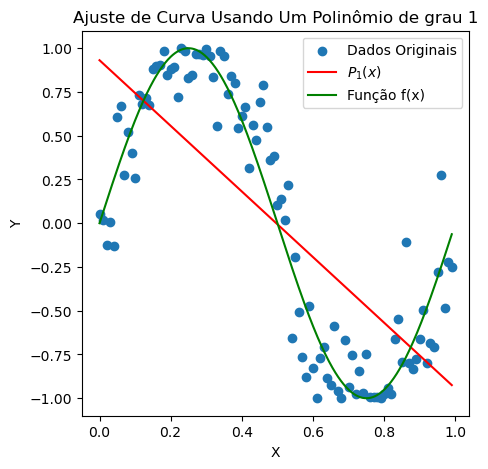

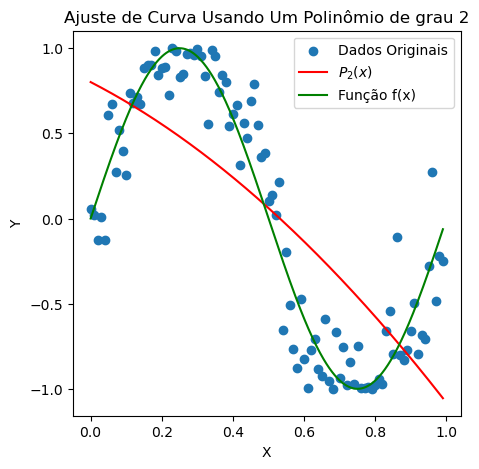

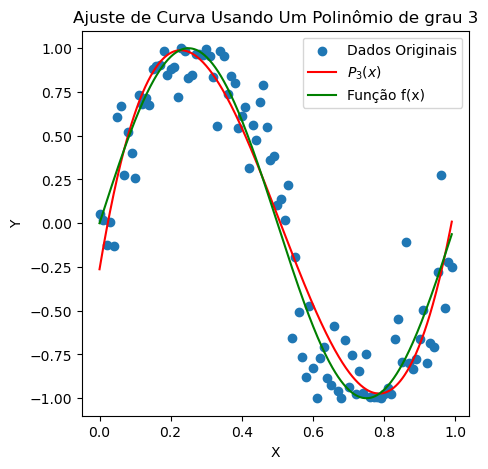

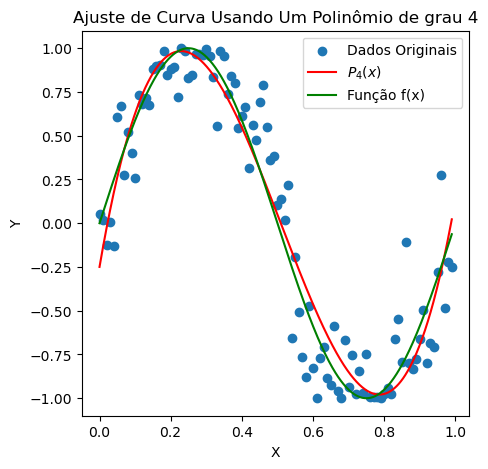

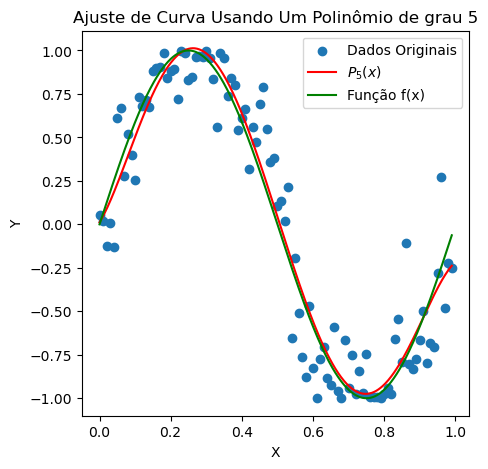

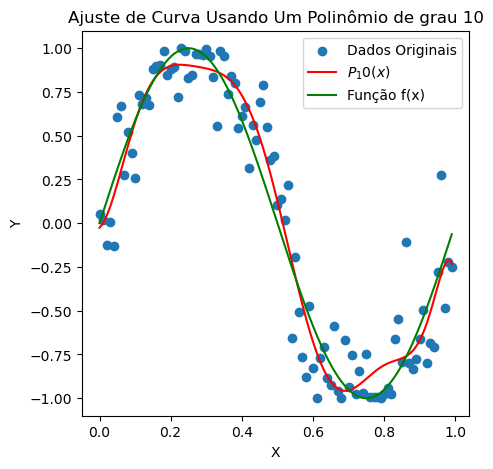

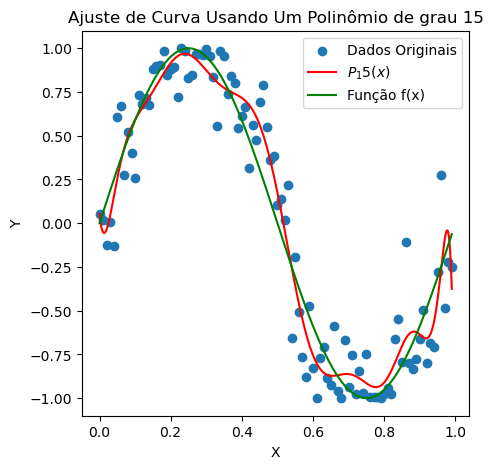

C:\Users\Allan\AppData\Local\Temp\ipykernel_20872\3785091167.py:5: RankWarning: Polyfit may be poorly conditioned
  ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)


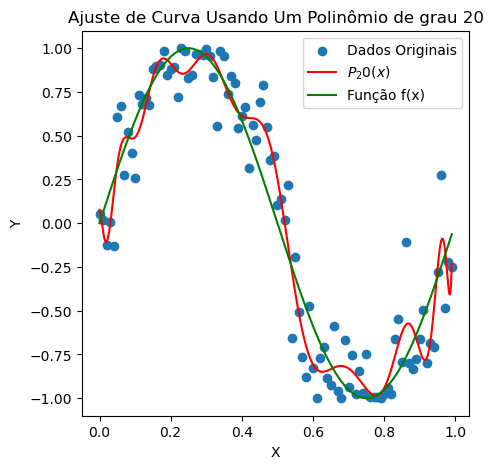

C:\Users\Allan\AppData\Local\Temp\ipykernel_20872\3785091167.py:5: RankWarning: Polyfit may be poorly conditioned
  ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)


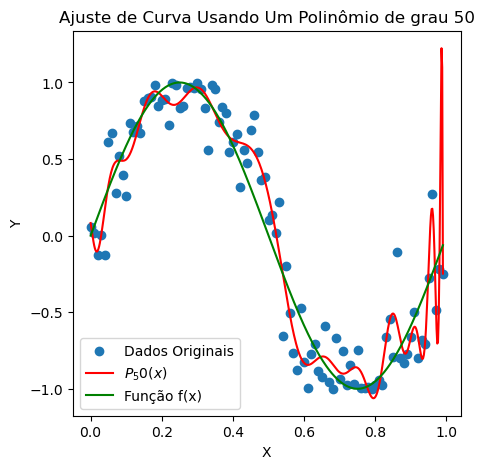

C:\Users\Allan\AppData\Local\Temp\ipykernel_20872\3785091167.py:5: RankWarning: Polyfit may be poorly conditioned
  ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)


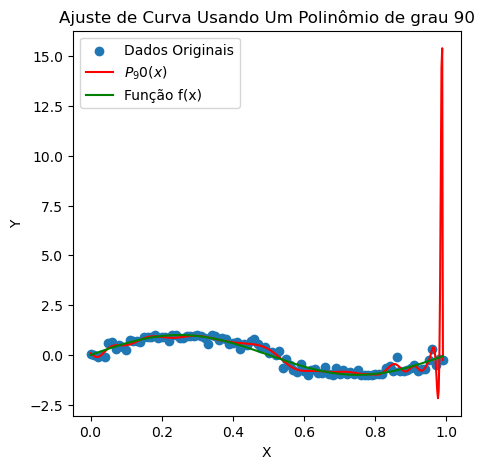

C:\Users\Allan\AppData\Local\Temp\ipykernel_20872\3785091167.py:5: RankWarning: Polyfit may be poorly conditioned
  ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)


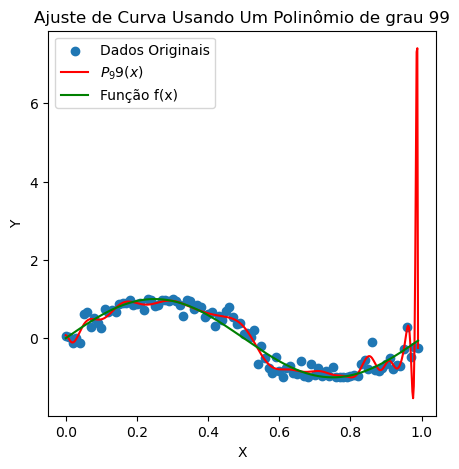

C:\Users\Allan\AppData\Local\Temp\ipykernel_20872\3785091167.py:5: RankWarning: Polyfit may be poorly conditioned
  ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)


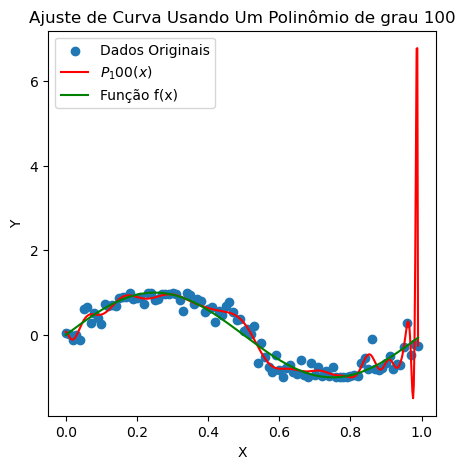

In [8]:
lista_graus = [1,2,3,4,5,10,15,20,50,90, 99, 100]

for n in lista_graus:
    plt.figure(figsize=(5, 5))
    ajuste_poly(x_treino, y_treino, n, 'np.sin(2*np.pi*x)', a, b)

Observe que, possivelmente até antes, mas certamente a partir do grau $50$, o polinômio de ajuste começa a apresentar sinais de sobreajuste aos dados. Um conjunto de dados maior pode prevenir o sobreajuste em polinômios de graus mais baixos, contudo, não evita esse problema em polinômios de alta complexidade (ou seja, de grau elevado).

A seguir temos a implmentação do cálculo do erro quadrático para cada um dos polinômios $9$ polinômios dados anteriormente.

In [9]:
lista_graus = [1,2,3,4,5,10,15,20,50,90, 99, 100]

for k in lista_graus:
    # Coeficientes do polinômio de mínimos quadrados
    coeficientes = np.polyfit(x_treino, y_treino, k)

    # Cria um polinômio a partir dos coeficientes
    np.poly1d(coeficientes)

    e = 0
    for i in range(0,N):
        ei = (np.poly1d(coeficientes)(x_treino[i]) - np.sin(2*np.pi*x_treino[i]))**2
        e = e + ei
    
    print(e)


19.631341579080246
19.73503817221695
0.6110288483309079
0.6074581976241652
0.23700389686850498
0.8246521545226091
1.2619242467233418
1.8234955169907947
2.248819107253798
2.3458365375318104
2.351313494300638
2.3503724840634455


D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


A análise do erro aqui funciona de modo inteiramente semelhante ao que fizemos no caso anterior ($N = 10$ pontos).

## Coeficientes da Regressão e Regularização

In [10]:
# Importações

import numpy as np

Os parâmetros ótimos da regressão linear são obtidos por meio da fórmula:

$$\hat{w} =(X^{T}X)^{-1}X^{T}y$$

em que

* $\hat{w}$: é o vetor dos parâmetros estimados do modelo de regressão;
* $X$: é a matriz de projeto ou matriz de características, onde as linhas representam as observações e as colunas representam as variáveis independentes (ou preditoras);
* $X^{T}$: é transposta de $X$;
* $y$: vetor da variável dependente (ou resposta) que estamos tentando prever.

In [11]:
# Entradas (1,1), (2,3), (5,4), (6,3)
x_treino = np.array([1,2,5,6])
y_treino = np.array([1,3,4,3])

n = 2

# Matriz de Vandermonde com n+1 colunas
X = np.vander(x_treino, n + 1, increasing=True)

# Coeficientes do polinômio de regressão
coef_reg = (np.linalg.inv(X.T @ X) @ X.T) @ y_treino

# polinômio de regressão
p = np.poly1d(coef_reg[::-1]) 

print(p)

        2
-0.375 x + 3.007 x - 1.588


Em termos computacionais, a etapa de inversão da matriz $X^{T}X$ é de grande complexidade. Essa complexidade aumenta quando preditoras estão fortemente correlacionadas, levando a matriz $X^{T}X$ a se aproximar de uma condição em que é quase impossível de ser invertida. Tal cenário pode resulta em multicolinearidade, o que, por sua vez, pode levar a um fenômeno conhecido como sobreajuste do modelo. Para ilustrar, consideremos o ajuste de $100$ valores gerados a partir de uma distribuição normal com média $0$ e desvio padrão $1$, e uma saída correspondendo ao dobro da entrada adicionada a um ruído normal com média $0$ e desvio padrão $0.01$.

In [12]:
# Entradas fortemente correlacionadas
x_treino = np.random.rand(100)
y_treino = 2*x_treino + np.random.normal(0, 0.01, 100)

n = 15

# Matriz de Vandermonde com n+1 colunas
X = np.vander(x_treino, n + 1, increasing=True)

# Coeficientes do polinômio de regressão
coef_reg = (np.linalg.inv(X.T @ X) @ X.T) @ y_treino


# polinômios de regressão
p = np.poly1d(coef_reg[::-1]) 

print(p)

print(f'\n O valor do maior coeficiente do polinômio de ajuste é {max(coef_reg)}.')

           15             14             13        12             11
1.029e+04 x  - 4.069e+04 x  + 5.011e+04 x  + 1235 x  - 4.563e+04 x 
              10             9             8         7        6
 + 1.552e+04 x  + 2.948e+04 x - 2.536e+04 x + 576.1 x + 7707 x
         5         4         3         2
 - 4085 x + 959.7 x - 122.2 x + 9.155 x + 1.975 x - 0.06891

 O valor do maior coeficiente do polinômio de ajuste é 50109.29511839687.


Para abordar essa questão de forma mais eficaz, uma estratégia consiste em adicionar um valor marginal à diagonal da matriz $X^{T}X$, o que facilita a estabilização de sua inversão. Essa modificação revelou-se benéfica, conforme observado pela melhoria no desempenho do modelo em conjuntos de dados de avaliação.

Em resumo, trocamos 

$$(X^{T}X)^{-1}X^{T}y$$

por 

$$(X^{T}X + \gamma^{2}I)^{-1}X^{T}y$$

In [13]:
# Parâmetro 
prmt = 1e-10

# Coeficientes do polinômio de regressão regularizado
coef_reg_regularizado = (np.linalg.inv(X.T @ X + (prmt)*np.eye(n+1)) @ X.T) @ y_treino

p_regularizado = np.poly1d(coef_reg_regularizado[::-1]) 

print(p_regularizado)

print(f'\n O valor do maior coeficiente do polinômio de ajuste regularizado é {max(coef_reg_regularizado)}.')

      15         14         13         12         11         10
-118 x  + 180.8 x  + 110.9 x  - 117.5 x  - 210.9 x  - 33.44 x 
          9         8         7         6         5         4        3
 + 228.4 x + 189.3 x - 210.1 x - 265.7 x + 408.5 x - 205.3 x + 47.8 x
         2
 - 4.99 x + 2.177 x - 0.0008754

 O valor do maior coeficiente do polinômio de ajuste regularizado é 408.49797038754605.


Note que $X^{T}X$ constitui uma matriz de covariância, contendo informações sobre a correlação entre as variáveis de $X$. Além disso, a diagonal de $X$ representa as covariâncias das variáveis consigo mesmas, isto é, suas variâncias. Portanto, incrementar a diagonal de $X$ equivale a uma ampliação artificial da variância dos dados, conferindo ao modelo uma robustez adicional e aprimorando sua capacidade de generalização. Este processo descreve a essência da **Regularização $L2$**, uma técnica projetada para mitigar o problema de sobreajuste e melhorar a generalização do modelo. Com esta modificação nossa função de custo passa de $(y - \hat{w}X)^{T}(y - \hat{w}X)$ para $\mathcal{L} = (y - \hat{w}X)^{T}(y - \hat{w}X) + \gamma\hat{w}^{T}\hat{w}$.

## Retornando ao Exemplos Inicial

Apresentaremos a regularização do polinômio de ajuste à função $f(x) = sen(2\pi x)$ no intervalo $[0,1]$. Consideraremos $3$ parâmetros, $\lambda_{1} = 0$ (sem regularização), $\lambda_{2} = 1$ e $\lambda_{3} = e^{-18}$.

In [14]:
# Entradas (mude N para 100 e n para 70 para ver um exemplo de maior complexidade)
N = 10 
a = 0
b = 1
x_treino = np.linspace(a,b,N)
n = 9

y_treino = []

for i in range(0,len(x_treino)):
    ruido = random.normalvariate(0, 0.3)
    y_real = np.sin(2*np.pi*x_treino[i])
    y_treino.append(y_real + ruido)

# Correção: Para um polinômio de grau n, devemos gerar a matriz de Vandermonde com n + 1 colunas.
X = np.vander(x_treino, n + 1, increasing=True)

In [15]:
def poly_regularizar(X,prmt,n):
    coef_reg_regularizado = (np.linalg.inv(X.T @ X + (prmt/2)*np.eye(n+1)) @ X.T) @ y_treino
    p_regularizado = np.poly1d(coef_reg_regularizado[::-1])
    return p_regularizado

In [16]:
print(poly_regularizar(X,0,n))

           9             8             7             6             5
5.726e+04 x - 2.639e+05 x + 5.098e+05 x - 5.354e+05 x + 3.314e+05 x
              4             3        2
 - 1.224e+05 x + 2.594e+04 x - 2841 x + 124.1 x + 0.1741


In [17]:
print(poly_regularizar(X,1,n))

        9          8          7          6           5          4
0.3069 x + 0.2585 x + 0.1926 x + 0.1036 x - 0.01574 x - 0.1715 x
           3         2
 - 0.3605 x - 0.534 x - 0.4498 x + 0.448


In [18]:
print(poly_regularizar(X,np.exp(-18),n))

        9        8         7        6         5        4         3
-718.5 x + 1235 x + 211.4 x - 1051 x - 347.8 x + 1238 x - 704.2 x
          2
 + 141.5 x - 5.265 x + 0.1659


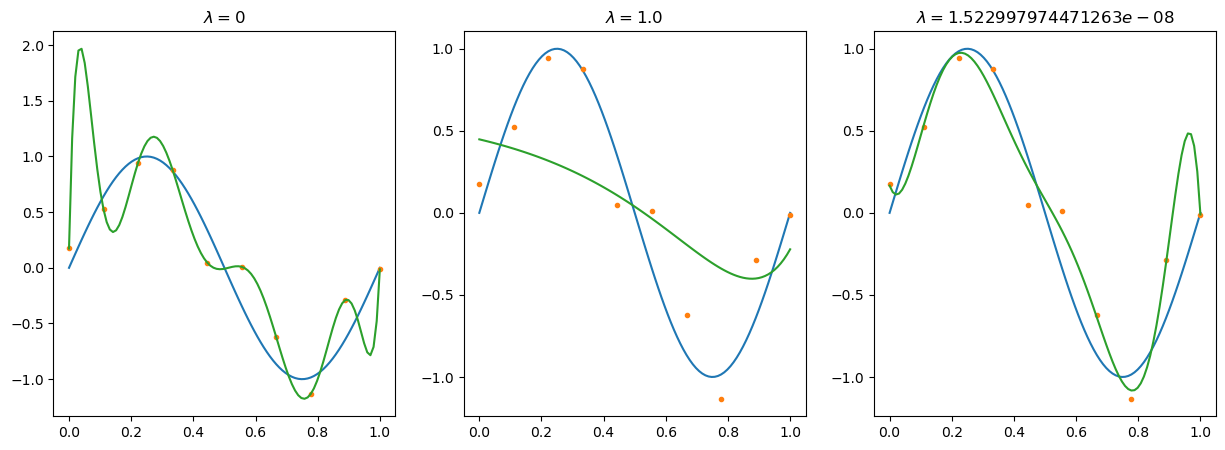

In [19]:
x = np.linspace(a,b,100)
y = np.sin(2*np.pi*x)

plt.figure(figsize=(15, 5))  # Ajuste a largura e altura conforme necessário

lista_parametros = [0,np.exp(0),np.exp(-18)]

for i in range(1,4):
    plt.subplot(1, 3, i)
    plt.plot(x,y)
    plt.plot(x_treino,y_treino,'.')
    plt.plot(x,poly_regularizar(X,lista_parametros[i-1],n)(x))
    plt.title(f'$\lambda = {lista_parametros[i-1]}$')

plt.show()